# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course). 
- **Deadline is October 19**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

****
**Name: Smith Sodhan Trivedi**  
**Neptun ID:CW9OY2**

**Dataset Fruits-360**

**Architecture : VGG16**
****

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem. 

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualisations (any of the following: matplotlib, seaborn, tensorboard, ...) of the accuracy and loss and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**


In [44]:
# ADD YOUR CODE HERE
from logging import warning
import numpy as np 
import pandas as pd 
import torch
import matplotlib.pyplot as plt
import os
from PIL import Image
import torchvision
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torch.utils.data import random_split, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import numpy as np
import cv2
import warnings 
from collections import Counter
warnings.filterwarnings('ignore')
import random


## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading the dataset
Show some images and labels of your dataset

In [2]:
# ADD YOUR CODE HERE
import zipfile
with zipfile.ZipFile('/content/DND.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/')

In [3]:
## Folder
print(os.listdir('Data/DND'))
print(os.listdir('Data/DND/Training'))

['Training', 'Validation', 'Test']
['Banana', 'Apple Red Delicious', 'Eggplant', 'Blueberry', 'Avocado']


In [4]:
train_folders = os.listdir('Data/DND/Training/')
validation_folders = os.listdir('Data/DND/Validation/')

labels = []
#since labels are not explicitly given we will build our own label list from folder_name 
for i in train_folders:
  path = ('Data/DND/Training/'+ i)
  for j in range(0, len(os.listdir(path))): 
    labels.append(i)


test_labels = [] #to evaluate trained model
for i in train_folders:
  path = ('Data/DND/Validation/'+ i)
  for j in range(0, len(os.listdir(path))): 
    test_labels.append(i)


In [5]:
fp = [] # path of all training images
for i in train_folders:
    path = ('Data/DND/Training/'+ i )
    for j in os.listdir(path):
      pt =  path + '/' + j
      fp.append(pt)


In [6]:
tp = [] # path of all testing images
for i in validation_folders:
    path = ('Data/DND/Validation/'+ i )
    for j in os.listdir(path):
      pt =  path + '/' + j
      tp.append(pt)


### Distribution of Data

In [7]:
print('len of training data: ', len(fp))
print('len of Validation data: ', len(tp))

len of training data:  2337
len of Validation data:  785


The distribution of training data
Counter({'Banana': 490, 'Apple Red Delicious': 490, 'Eggplant': 468, 'Blueberry': 462, 'Avocado': 427})


Text(0, 0.5, 'Count')

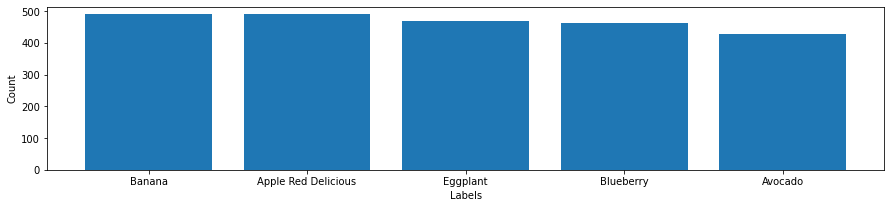

In [9]:
print('The distribution of training data')
print(Counter(labels))
keys = Counter(labels).keys()
values = Counter(labels).values()

plt.rcParams["figure.figsize"] = (15,3)
plt.bar(keys, values)
plt.xlabel('Labels')
plt.ylabel('Count')


### Random images of Training data (with label) [Scroll] 

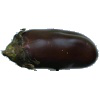

Eggplant


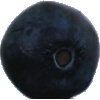

Blueberry


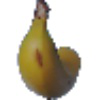

Banana


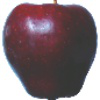

Apple Red Delicious


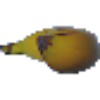

Banana


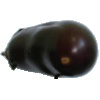

Eggplant


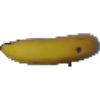

Banana


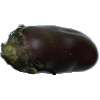

Eggplant


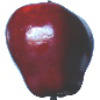

Apple Red Delicious


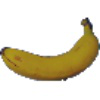

Banana


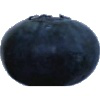

Blueberry


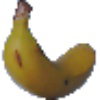

Banana


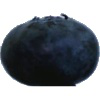

Blueberry


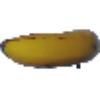

Banana


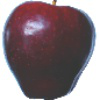

Apple Red Delicious


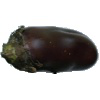

Eggplant


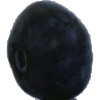

Blueberry


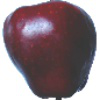

Apple Red Delicious


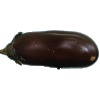

Eggplant


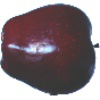

Apple Red Delicious


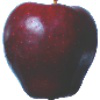

Apple Red Delicious


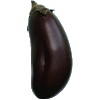

Eggplant


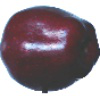

Apple Red Delicious


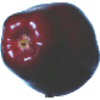

Apple Red Delicious


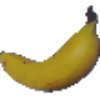

Banana


In [10]:
rand_path = []
for i in range(0, 25):
    i = random.randrange(2000)
    image = Image.open(fp[i])
    rand_path.append(fp[i])
    #print("data to  be trained")
    display(image)
    print(labels[i])

 

In [11]:
train_df = pd.DataFrame( columns = ['data', 'labels'])
train_df['data'] = fp 
train_df['labels'] = labels
test_df = pd.DataFrame( columns = ['data', 'actual'])
test_df['data'] = tp 
test_df['actual'] = test_labels

In [12]:
#training data 
train_df

,data,labels
0,Data/DND/Training/Banana/r_310_100.jpg,Banana
1,Data/DND/Training/Banana/r_20_100.jpg,Banana
2,Data/DND/Training/Banana/r_208_100.jpg,Banana
3,Data/DND/Training/Banana/175_100.jpg,Banana
4,Data/DND/Training/Banana/r_131_100.jpg,Banana
...,...,...
2332,Data/DND/Training/Avocado/214_100.jpg,Avocado
2333,Data/DND/Training/Avocado/143_100.jpg,Avocado
2334,Data/DND/Training/Avocado/r_234_100.jpg,Avocado
2335,Data/DND/Training/Avocado/35_100.jpg,Avocado


In [13]:
## validation data 
test_df

,data,actual
0,Data/DND/Validation/Banana/100_100.jpg,Banana
1,Data/DND/Validation/Banana/r_33_100.jpg,Banana
2,Data/DND/Validation/Banana/r_73_100.jpg,Banana
3,Data/DND/Validation/Banana/r_14_100.jpg,Banana
4,Data/DND/Validation/Banana/21_100.jpg,Banana
...,...,...
780,Data/DND/Validation/Avocado/48_100.jpg,Avocado
781,Data/DND/Validation/Avocado/83_100.jpg,Avocado
782,Data/DND/Validation/Avocado/r_81_100.jpg,Avocado
783,Data/DND/Validation/Avocado/r_42_100.jpg,Avocado


#### Pre-processing the dataset

In [22]:
# ADD YOUR CODE HERE
data_dir = '/content/Data/DND/Training/'
val_dir = '/content/Data/DND/Validation/'
test_dir = '/content/Data/DND/Test/'
mean , std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
# 
transformations = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((256, 256)), 
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])

dataset = ImageFolder(data_dir, transform = transformations)
val_ds = ImageFolder(val_dir, transform = transformations)
#test_ds = ImageFolder(test_dir, transform = transformations)



#### Splitting the dataset

In [31]:
# ADD YOUR CODE HERE
train_ds, test_ds = random_split(dataset, [2000, 337]) #15% test, 85 train #approx
print('size of train data',len(train_ds))
print('size of val data',len(val_ds))
print('size of test data',len(test_ds))

size of train data 2000
size of val data 785
size of test data 337


In [39]:
batch_size = 3
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True, num_workers=2)
valid_dl = DataLoader(val_ds,batch_size=batch_size, num_workers=2)
test_dl = DataLoader(test_ds,batch_size=batch_size,num_workers =2)

## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

In [43]:
# ADD YOUR CODE HERE
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [46]:
vgg16 = models.vgg16(pretrained=True)
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [47]:
classes = 5
num_ftrs = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_ftrs, out_features=(classes))

model_ft = vgg16.to(device) #final model tro train

In [48]:
print(model_ft)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#### Load the architecture

In [49]:
# ADD YOUR CODE HERE
# Summary
summary(model_ft, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

#### Define your optimizer and loss function

In [51]:
# ADD YOUR CODE HERE
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)

In [53]:
class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=3, min_delta=0):
     
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = './best_net.pth'

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            torch.save(model_ft.state_dict(), self.best_model)
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

early_stopping = EarlyStopping()


#### Train your network

In [54]:
# ADD YOUR CODE HERE
def evaluate():
  running_loss = 0.0
  
  with torch.no_grad():
    for i, data in enumerate(valid_dl, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model_ft(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()
  val_loss = running_loss / len(valid_dl)
  print('val loss: %.3f' % (val_loss))
  return val_loss

def eval_acc(train=False):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      loader = train_dl if train else valid_dl
      for data in loader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)
          # calculate outputs by running images through the network
          outputs = model_ft(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  
  print('Accuracy of the network on the %s images: %d %%' % (
      'train' if train else 'test', 100 * correct / total))


In [55]:
# ADD YOUR CODE HERE
def train():
  NUM_EPOCHS = 10
  for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times
      print(f'Epoch {epoch+1}:')
      running_loss = 0.0
      for i, data in enumerate(train_dl, 0):
          # get the inputs; data is a list of [inputs, labels]
          #inputs, labels = data
          inputs, labels = data[0].to(device), data[1].to(device) #set for GPU if available

          # zero the parameter gradients
          optimizer_ft.zero_grad()

          # forward + backward + optimize
          outputs = model_ft(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer_ft.step()

          # print statistics
          running_loss += loss.item()
          if i % 250 == 0 and i!= 0: 
              print(f'Iteration {i}, loss = {(running_loss / 250):.3f}')
              running_loss = 0.0

      val_loss = evaluate()
      eval_acc()
      early_stopping(val_loss)
      if early_stopping.early_stop:
          break

  print('Finished Training')

#### Show results (accuracy and loss) on training and validation sets


In [56]:
# ADD YOUR CODE HERE
train()

Epoch 1:
Iteration 250, loss = 0.901
Iteration 500, loss = 0.397
val loss: 0.238
Accuracy of the network on the test images: 92 %
Epoch 2:
Iteration 250, loss = 0.002
Iteration 500, loss = 0.000
val loss: 0.072
Accuracy of the network on the test images: 97 %
Epoch 3:
Iteration 250, loss = 0.000
Iteration 500, loss = 0.000
val loss: 0.075
Accuracy of the network on the test images: 97 %
INFO: Early stopping counter 1 of 3
Epoch 4:
Iteration 250, loss = 0.000
Iteration 500, loss = 0.000
val loss: 0.079
Accuracy of the network on the test images: 97 %
INFO: Early stopping counter 2 of 3
Epoch 5:
Iteration 250, loss = 0.000
Iteration 500, loss = 0.000
val loss: 0.081
Accuracy of the network on the test images: 98 %
INFO: Early stopping counter 3 of 3
INFO: Early stopping
Finished Training


In [57]:
# Save the model
PATH = './fruits_360.pth'
torch.save(model_ft, PATH)

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [58]:
# ADD YOUR CODE HERE
correct = 0
total = 0
with torch.no_grad():
    for data in test_dl:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the ',test_dl.dataset.__len__(),' test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  337  test images: 100 %


#### Show some predictions


In [61]:
# ADD YOUR CODE HERE
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
    
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Eggplant , Predicted: Eggplant
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Avocado , Predicted: Avocado
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious


AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Banana , Predicted: Banana
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Banana , Predicted: Banana
AxesImage(135,27;837x163.08)
Label: Avocado , Predicted: Avocado


AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Avocado , Predicted: Avocado
AxesImage(135,27;837x163.08)
Label: Eggplant , Predicted: Eggplant
AxesImage(135,27;837x163.08)
Label: Avocado , Predicted: Avocado
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Blueberry 

, Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Banana , Predicted: Banana
AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry
AxesImage(135,27;837x163.08)
Label: Apple Red Delicious , Predicted: Apple Red Delicious
AxesImage(135,27;837x163.08)
Label: Blueberry , Predicted: Blueberry


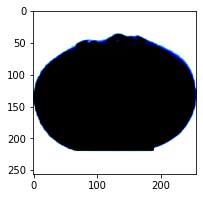

In [78]:
model = torch.load(PATH)
for i in range(0, 25):
    i = random.randrange(337)
    img, label = test_ds[i]
    print(plt.imshow(img.permute(1, 2, 0)))
    print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Banana , Predicted: Banana


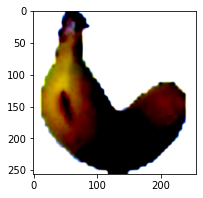

In [64]:
model = torch.load(PATH)
img, label = test_ds[10]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Eggplant , Predicted: Eggplant


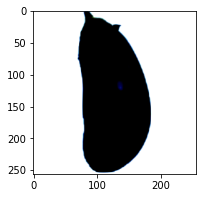

In [66]:
model = torch.load(PATH)
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Blueberry , Predicted: Blueberry


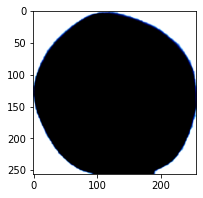

In [68]:
model = torch.load(PATH)
img, label = test_ds[331]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Red Delicious , Predicted: Apple Red Delicious


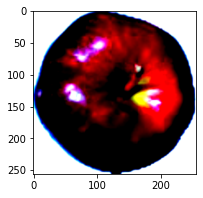

In [72]:
model = torch.load(PATH)
img, label = test_ds[101]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

#### Answer the questions

### How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

In [ ]:
# ADD YOUR ANSWERS HERE

In [75]:
eval_acc(train=True)


Accuracy of the network on the train images: 100 %


In [76]:
eval_acc()


Accuracy of the network on the test images: 97 %


#### Answer : The model doesnt seem to be underfitted as the predictions are to the point however it could be overfitted as it is trained on a small sample but still gives great results (100%, 97%) on test data which could lead to the model to be too specific and not generic.